In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Modelo PSPL
mu = lambda u0 : (u0**2+2)/(u0*np.sqrt(u0**2+4))


Text(0, 0.5, '$\\sigma_{mag}$')

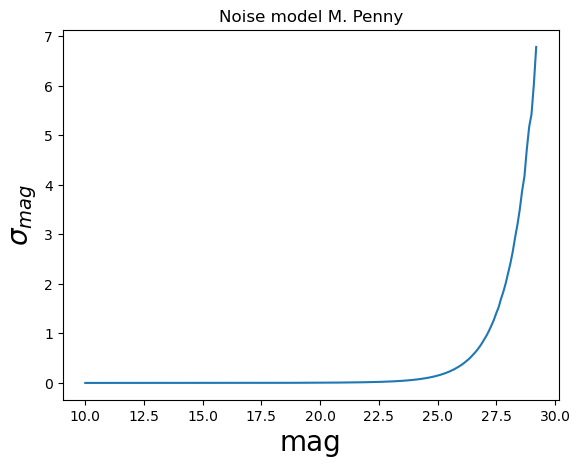

In [2]:
import pandas as pd
snr = pd.read_csv("snr_Roman.txt", sep=" ", names=["mag","err_mag"])
plt.plot(snr["mag"], snr["err_mag"])
plt.title('Noise model M. Penny')
plt.xlabel("mag",fontsize=20)
plt.ylabel("$\\sigma_{mag}$",fontsize=20)

Text(0, 0.5, '$\\mu_0 = 2.5 * LOG (5 \\sigma_{mag})$')

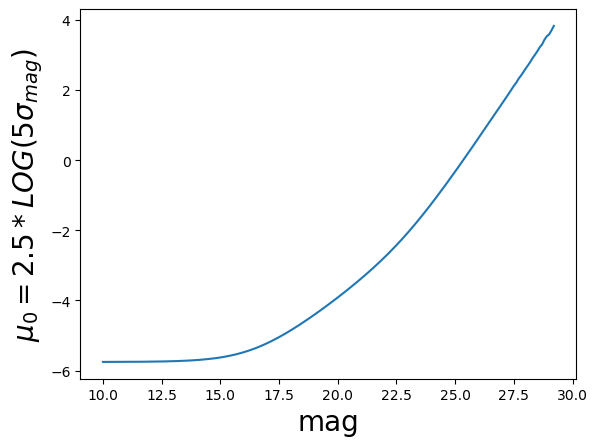

In [3]:
mu0 = 2.5*np.log10(5*snr['err_mag'])
plt.plot(snr['mag'],mu0)
plt.xlabel('mag', fontsize=20)
plt.ylabel('$\\mu_0 = 2.5 * LOG (5 \\sigma_{mag})$', fontsize=20)

Text(0, 0.5, '$\\mu_0 = 2.5 * LOG (5 \\sigma_{mag})$')

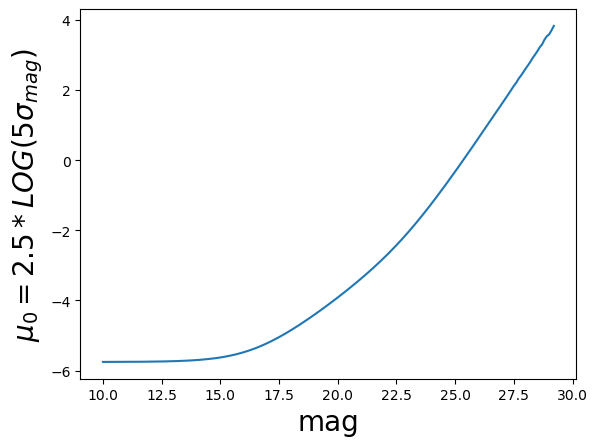

In [4]:
mu0 = 2.5*np.log10(5*snr['err_mag'])
plt.plot(snr['mag'],mu0)
plt.xlabel('mag', fontsize=20)
plt.ylabel('$\\mu_0 = 2.5 * LOG (5 \\sigma_{mag})$', fontsize=20)

In [7]:
import numpy as np

# Define the mu function as given
def mu(u0):
    return (u0**2 + 2) / (u0 * np.sqrt(u0**2 + 4))

# Define the function we want to find roots for: f(u0) = mu(u0) - target_mu
def f(u0, target_mu):
    return mu(u0) - target_mu

# Numerical derivative of f(u0) with respect to u0
def df(u0, target_mu, h=1e-5):
    return (f(u0 + h, target_mu) - f(u0 - h, target_mu)) / (2 * h)

# Newton-Raphson method
def newton_raphson(target_mu, initial_guess, tol=1e-6, max_iter=100):
    u0 = initial_guess
    for i in range(max_iter):
        f_val = f(u0, target_mu)
        df_val = df(u0, target_mu)
        
        # Avoid division by zero
        if df_val == 0:
            # print("Derivative is zero. Stopping iteration.")
            return None

        # Update u0 using Newton-Raphson formula
        u0_next = u0 - f_val / df_val

        # Check for convergence
        if abs(u0_next - u0) < tol:
            return u0_next
        
        u0 = u0_next
    
    print("Newton-Raphson did not converge within the maximum number of iterations.")
    return None

# Example us

In [21]:
import numpy as np
from scipy.optimize import newton

# Define the mu function
def mu(u0):
    return (u0**2 + 2) / (u0 * np.sqrt(u0**2 + 4))

# Define the function to find roots of: f(u0) = mu(u0) - target_mu
def f(u0, target_mu):
    return mu(u0) - target_mu

initial_guesses = [0.5, 2.0, 5.0]  # Try different initial guesses
# Parameters
mu_plot = []
u0_plot = []
mag_plot = []
i=0
for target_mu in mu0:
    # Use the SciPy newton function to find u0 values for each initial guess
    u0_solutions = []
    for guess in initial_guesses:
        try:
            # Find root using Newton's method with SciPy
            u0_solution = newton(f, guess, args=(target_mu,), tol=1e-8, maxiter=100)
            # Ensure unique solutions
            if not any(np.isclose(u0_solution, sol, atol=1e-6) for sol in u0_solutions):
                u0_solutions.append(u0_solution)
        except RuntimeError:
            print(f"Newton's method did not converge for initial guess {guess}")

    # print("u0 values for mu =", target_mu, ":", u0_solutions)
    for u in u0_solutions:
        mu_plot.append(target_mu)
        u0_plot.append(u)
        mag_plot.append(snr['mag'][i])
    i+i+1

Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's method did not converge for initial guess 0.5
Newton's method did not converge for initial guess 2.0
Newton's method did not converge for initial guess 5.0
Newton's m

In [19]:
initial_guesses = [0.5, 2.0, 5.0]  # Try different initial guesses
u0 = []

mu_plot = []
u0_plot = []
mag_plot = []
i=0
for target_mu in mu0:
    u0_solutions = [newton_raphson(target_mu, guess) for guess in initial_guesses]
    u0_solutions = [u0 for u0 in u0_solutions if u0 is not None]  # Filter out None values

    for u in u0_solutions:
        mu_plot.append(target_mu)
        u0_plot.append(u)
        mag_plot.append(snr['mag'][i])
    i=i+1 

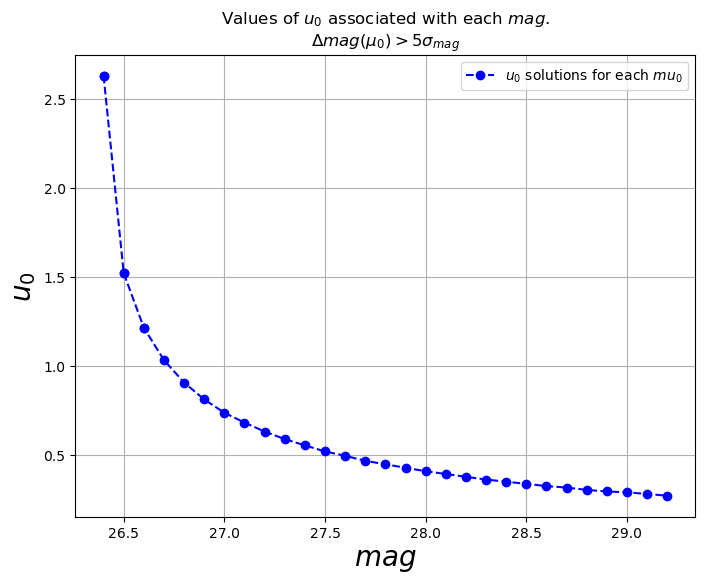

In [20]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(mag_plot, u0_plot, color='blue',marker='o',ls='--', label=r'$u_0$ solutions for each $mu_0$')
plt.xlabel(r'$mag$',fontsize=20)
plt.ylabel(r'$u_0$',fontsize=20)
plt.title(r'Values of $u_0$ associated with each $mag$.'+'\n$\Delta mag (\\mu_0)>5\\sigma_{mag}$')
plt.legend()
plt.grid(True)
plt.show()